In [11]:
# resources
import sys
sys.path.append("../../py")
from indirect.problems import planet2planet
import pygmo as pg
import pygmo_plugins_nonfree as pg7
%matplotlib inline

In [2]:
# algorithm
uda = pg7.snopt7(True, "/usr/lib/libsnopt7_c.so")
uda.set_integer_option("Major iterations limit", 4000)
uda.set_integer_option("Iterations limit", 20000)
uda.set_numeric_option("Major optimality tolerance", 1e-3)
uda.set_numeric_option("Major feasibility tolerance", 1e-9)
algo = pg.algorithm(uda)
#uda = pg.mbh(algo, 10, 0.05)
#algo = pg.algorithm(uda)

In [3]:
# problem
udp = planet2planet(
    p0="earth", pf="mars", mass=1000, tmax=0.05, isp=2500, rtol=1e-6, atol=1e-6
)
udp.leg.dynamics.alpha = 0
udp.leg.dynamics.bound = True
prob = pg.problem(udp)

In [4]:
# population
pop = pg.population(prob, 1)

In [5]:
# evolve
pop = algo.evolve(pop)

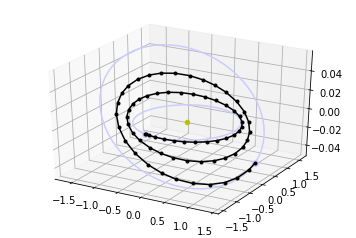

In [13]:
# plot trajectory
udp.plot_traj(pop.champion_x)

In [7]:
traj = udp.leg.get_trajectory()

/usr/lib/python3.6/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: larger nmax is needed
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


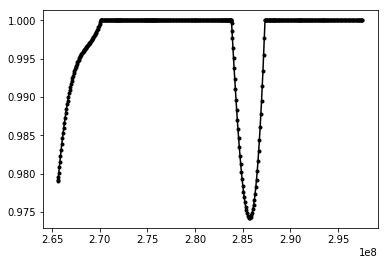

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(traj[:, 0], traj[:, 15], "k.-")
plt.show()